In [12]:
# Importação das bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [13]:
# Importação do Dataset
dataset = pd.read_csv("vgsales.csv")

In [14]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [15]:
dataset.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [16]:
# Checkando se há valores nulos no dataset
dataset.isnull().values.any()

True

In [17]:
# Checkando qual coluna contém valores nulos
print(dataset['Rank'].isnull().values.any())
print(dataset['Name'].isnull().values.any())
print(dataset['Platform'].isnull().values.any())
print(dataset['Year'].isnull().values.any())
print(dataset['Genre'].isnull().values.any())
print(dataset['Publisher'].isnull().values.any())
print(dataset['NA_Sales'].isnull().values.any())
print(dataset['EU_Sales'].isnull().values.any())
print(dataset['JP_Sales'].isnull().values.any())
print(dataset['Other_Sales'].isnull().values.any())
print(dataset['Global_Sales'].isnull().values.any())

False
False
False
True
False
True
False
False
False
False
False


In [18]:
# Checkando o número de linhas com valores nulos no dataset
print(dataset['Year'].isnull().sum())
print(dataset['Publisher'].isnull().sum())

271
58


In [19]:
# Removendo os valores nulos
dataset = dataset.dropna(axis=0, subset=["Year", "Publisher"])

In [20]:
# Checkando novamente se há valores nulos no dataset
dataset.isnull().values.any()

False

In [21]:
# Definindo as features e a variável dependente
x = dataset.iloc[:,1:-1].values
y = dataset.iloc[:,-1].values
print(x[0])
print(y)

['Wii Sports' 'Wii' 2006.0 'Sports' 'Nintendo' 41.49 29.02 3.77 8.46]
[8.274e+01 4.024e+01 3.582e+01 ... 1.000e-02 1.000e-02 1.000e-02]


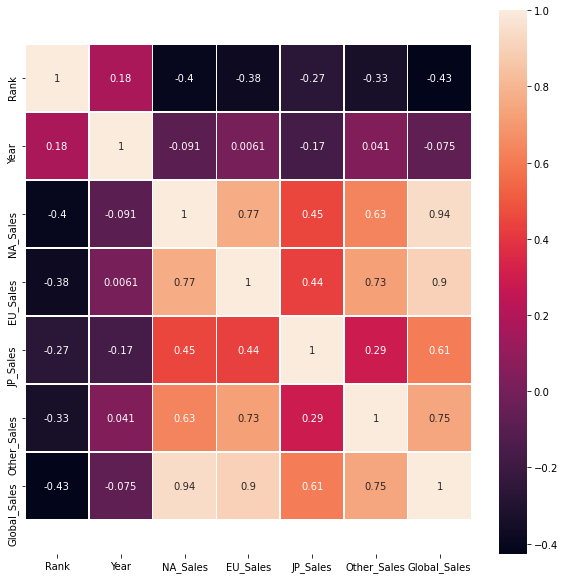

In [22]:
# Usando heatmap no cálculo da variável de resultado para determinar a relevância das features
corrmat = dataset.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))

# Plotando heatmap
g = sns.heatmap(dataset[top_corr_features].corr(), annot=True, linewidths=.5)
b, t = plt.ylim() # Encontrando os valores bottom e top
b += 0.5
t -= 0.5
plt.ylim(b, t)
plt.show()


In [23]:
# Retendo apenas as features úteis do Dataset
# A partir do heatmap, foi decidido que as colunas NA_sales, JP_Sales, EU_Sales o Other_Sales são as features mais úteis
# na determinação das vendas globais
x = dataset.iloc[:,6:-1].values
print(x[0])

[41.49 29.02  3.77  8.46]


In [24]:
# Split do dataset
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [25]:
print(x_train)
print(x_test)
print(y_train)
print(y_test)

[[0.01 0.   0.   0.  ]
 [0.05 0.04 0.   0.01]
 [0.44 0.02 0.   0.04]
 ...
 [0.1  0.01 0.   0.01]
 [0.06 0.02 0.   0.01]
 [0.67 0.01 0.   0.06]]
[[0.1  0.07 0.   0.01]
 [0.   0.   0.19 0.  ]
 [0.02 0.01 0.   0.  ]
 ...
 [0.15 0.   0.   0.01]
 [0.   0.   0.12 0.  ]
 [0.   0.   0.3  0.  ]]
[0.01 0.09 0.49 ... 0.11 0.09 0.74]
[0.19 0.19 0.02 ... 0.16 0.12 0.3 ]


### Regressão Linear Mútipla

In [27]:
# Treinando a regressão linear múltipla no training set
from sklearn.linear_model import LinearRegression
regressor_MultiLinear = LinearRegression()
regressor_MultiLinear.fit(x_train, y_train)

LinearRegression()

In [28]:
# Predução dos resultados de teste
y_pred = regressor_MultiLinear.predict(x_test)

In [31]:
# Cálculo do R2-Score
from sklearn.metrics import r2_score
r2_MultiLinear = r2_score(y_test, y_pred)
print(r2_MultiLinear)

0.9999863067614225


### Regressão Polinomial

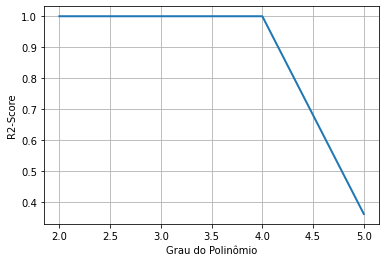

In [35]:
# Encontrando o melhor grau de polinômio para regressão
from sklearn.preprocessing import PolynomialFeatures
scores_list = []
pRange = range(2,6)
for i in pRange:
    poly_reg = PolynomialFeatures(degree=i)
    x_poly = poly_reg.fit_transform(x_train)
    poly_regressor = LinearRegression()
    poly_regressor.fit(x_poly, y_train)
    y_pred = poly_regressor.predict(poly_reg.fit_transform(x_test))
    scores_list.append(r2_score(y_test,y_pred))
plt.plot(pRange, scores_list, linewidth=2)
plt.xlabel("Grau do Polinômio")
plt.ylabel("R2-Score")
plt.grid()
plt.show()

In [36]:
# Treinamento da regressão polinomial no modelo de treinamento
poly_reg = PolynomialFeatures(degree=2)
x_poly = poly_reg.fit_transform(x_train)
poly_regressor = LinearRegression()
poly_regressor.fit(x_poly,y_train)
y_pred = poly_regressor.predict(poly_reg.fit_transform(x_test))
r2_poly = r2_score(y_test,y_pred)
print(r2_poly)

0.9999862983602374


### Regressão K-Nearest Neighbors

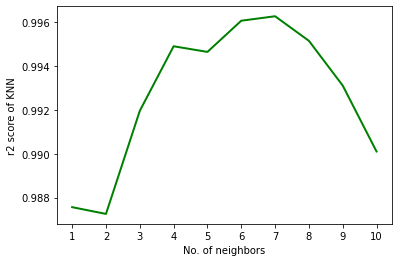

In [37]:
from sklearn.neighbors import KNeighborsRegressor
knnRange = range(1,11,1)
scores_list = []
for i in knnRange:
    regressor_knn = KNeighborsRegressor(n_neighbors=i)
    regressor_knn.fit(x_train,y_train)
    y_pred = regressor_knn.predict(x_test)
    scores_list.append(r2_score(y_test,y_pred))
plt.plot(knnRange,scores_list,linewidth=2,color='green')
plt.xticks(knnRange)
plt.xlabel('No. of neighbors')
plt.ylabel('r2 score of KNN')
plt.show() 